In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep= '\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
len(df)

5572

In [13]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

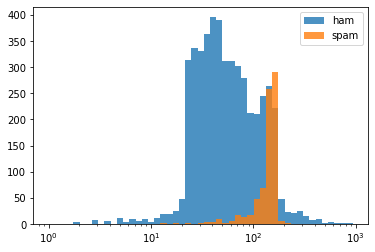

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np. arange(0,50))
plt. hist (df[df['label']=='ham' ]['length'], bins=bins, alpha=0.8)

plt. hist (df[df['label']=='spam' ]['length'], bins=bins, alpha=0.8)


plt. legend( ('ham', 'spam'))
plt. show()


In [23]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

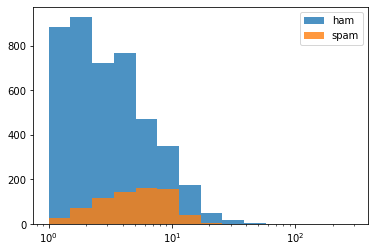

In [33]:
plt.xscale('log')
bins = 1.5**(np. arange(0,15))
plt. hist (df[df['label']=='ham' ]['punct'], bins=bins, alpha=0.8)

plt. hist (df[df['label']=='spam' ]['punct'], bins=bins, alpha=0.8)


plt. legend( ('ham', 'spam'))
plt. show()


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# X feature data 
X =df[['length','punct']]
# y is our label
Y= df['label']

X_train , X_test , Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state = 42)

In [36]:
X_train.shape

(3900, 2)

### Training Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model = LogisticRegression()

In [39]:
lr_model = LogisticRegression(solver="lbfgs")

In [40]:
lr_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
from sklearn import metrics

#### Compare theese two  -> y_test and y_prediction

In [42]:
predictions= lr_model.predict(X_test)

In [43]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [45]:
metrics.confusion_matrix(Y_test,predictions)

array([[1404,   44],
       [ 219,    5]])

ADDIng labels for easy understanding

In [47]:
df = pd.DataFrame(metrics.confusion_matrix(Y_test,predictions),index=['ham','spam'], columns=['ham','spam'])

In [48]:
df

,ham,spam
ham,1404,44
spam,219,5


In [50]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [51]:
metrics.accuracy_score(Y_test, predictions)

0.8427033492822966

Other Model

In [53]:
from sklearn.naive_bayes import MultinomialNB


In [55]:
nb_model= MultinomialNB()
nb_model.fit(X_train,Y_train)
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(Y_test,predictions))

[[1438   10]
 [ 224    0]]


In [57]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [56]:
metrics.accuracy_score(Y_test, predictions)

0.8600478468899522

Other model

In [58]:
from sklearn.svm import SVC

In [60]:
svm_model =SVC(gamma='auto')
svm_model.fit(X_train,Y_train)
predictions = svm_model.predict(X_test)
print(metrics.confusion_matrix(Y_test,predictions))
print(metrics.classification_report(Y_test,predictions))


[[1373   75]
 [ 121  103]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [61]:
metrics.accuracy_score(Y_test, predictions)

0.8827751196172249

#### Build a vocabulary

The goal here is to build a numerical array from all the words that appear in every document. Later we'll create instances
(vectors) for each individual document.

In [64]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals


Overwriting 1.txt


In [65]:

%%writefile 2.txt
This story is about surfing
Catching waves is fun
Surfing is a popular water sport

Overwriting 2.txt


In [69]:
vocab ={}
i=1
with open('./1.txt') as f:
    x=f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i=i+1
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [70]:

with open('./2.txt') as f:
    x=f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i=i+1
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


#### Even though 2.txt has 15 words, only 7 new words were added to the dictionary.


Feature Extraction
Now that we've encapsulated our "entire language" in a dictionary, let's perform feature extraction on each of our original
documents:

In [85]:
# Create an empty vector with space for each word in the vocab:
one = ['1.txt'] +[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [86]:
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()
for word in x:
    one [vocab[word]]+=1
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [87]:
two = ['2.txt'] +[0]*len(vocab)
two

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [88]:
with open('2.txt') as f:
    x = f.read().lower().split()
for word in x:
    two [vocab[word]]+=1
two

['1.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]

In [89]:
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [90]:
two

['1.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]

## Bag of words